In [6]:
#Regression Analysis - Quantifying the relationship between two variables
#Can be handy when we want to forecast a variable with the help of patterns of our historical data

#Simple regression: Using only one variable
#A linear regression will calculate the error observed when using different lines and will determine which one contains the least error. 
#Linear Equation: y = mx + b - Simple regression equation y = a + bx

#First let's import the libraries 

import numpy as np
import pandas as pd

from scipy import stats
import statsmodels.api as sm


import matplotlib.pyplot as plt



In [13]:
#Let's load housing data to calculate a regression with the variables

data = pd.read_excel(r'C:\Users\elanm\Housing.xlsx')

In [14]:
data

,House Price,House Size (sq.ft.),State,Number of Rooms,Year of Construction
0,1116000,1940,IN,8,2002
1,860000,1300,IN,5,1992
2,818400,1420,IN,6,1987
3,1000000,1680,IN,7,2000
4,640000,1270,IN,5,1995
5,1010000,1850,IN,7,1998
6,600000,1000,IN,4,2015
7,700000,1100,LA,4,2014
8,1100000,1600,LA,7,2017
9,570000,1000,NY,5,1997


In [16]:
#Our first goal will be to regress a house's size on its price. 
#To focus only on that we will put the two variables with doble brackets to obtain the desire output. 

data[['House Price', 'House Size (sq.ft.)']]

,House Price,House Size (sq.ft.)
0,1116000,1940
1,860000,1300
2,818400,1420
3,1000000,1680
4,640000,1270
5,1010000,1850
6,600000,1000
7,700000,1100
8,1100000,1600
9,570000,1000


In [19]:
#Univariate Regression
#We will assing the data in the house size column to a variable we call X
#This information will stand for independent variable
#We obtain the values store in each columns 

X = data['House Size (sq.ft.)']
Y = data['House Price']

In [20]:
X

0     1940
1     1300
2     1420
3     1680
4     1270
5     1850
6     1000
7     1100
8     1600
9     1000
10    2150
11    1900
12    2200
13    1100
14     860
15    1325
16    1350
17    1600
18     950
19    1250
Name: House Size (sq.ft.), dtype: int64

In [21]:
Y

0     1116000
1      860000
2      818400
3     1000000
4      640000
5     1010000
6      600000
7      700000
8     1100000
9      570000
10     860000
11    1085000
12    1250000
13     850000
14     640000
15     900000
16     730000
17     750000
18     650000
19     680000
Name: House Price, dtype: int64

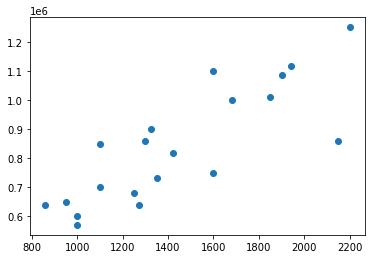

In [23]:
#Matplotlib helps us project our data in a graph. Let's use the scatter plot
#The graph will show a comparative of the behaviour of price when we increase the size

plt.scatter (X,Y)
plt.show()

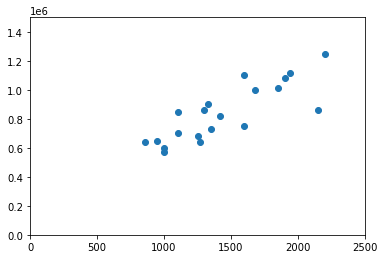

In [24]:
#Use Axis method to set the start and the end values of the axis

plt.scatter(X,Y)
plt.axis([0,2500,0,1500000])
plt.show()

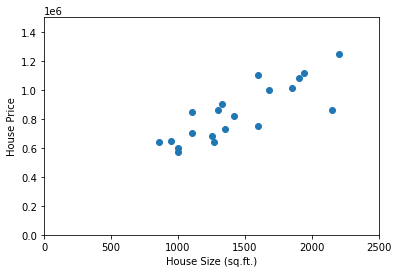

In [26]:
#Use label to properly name the axis for better understanding
#Creating a good visual representation of a data set is worth more than 1000x complex calculations in certain situations

plt.scatter(X,Y)
plt.axis([0,2500,0,1500000])
plt.ylabel('House Price')
plt.xlabel('House Size (sq.ft.)')
plt.show()

In [27]:
#The coefficients found with this technique are called OLS estimates
#We have to find a line that minimizes the distance between itself and the actual data observations
#Some regressions have more explanatory power than others, we need to be able te separate good vs bad regressions
#R Squared varies between 0-100%. The higher it is, the more predictive power the model has.

#The stats models module contains tools for running a regression
#The procedure to follow needs you to include a constant. We will assign the newly obtained information, wich is the object X and the constant to a new variable
#Let's call it X1

#Right after that we will assign to another variable 'reg' the output of an ordinary least squares regressions
#As arguments we must add the dependant variable Y and the newly defined X1


X1 = sm.add_constant(X)
reg = sm.OLS(Y,X1).fit()

In [28]:
#regg summary will display the OLS regression results and will organize them in three tables
#As you can see we have many statistics in front of us

#At the top you see the dependant variable and the type of regression we have run.
#R-squared is shown on the top rightcorner and 0.678 means that the independent variable in our regression 'House Size' explains 68% of the dependant variable 'House Price'
#We can affirm that our model has good explanatory power, house price is in fact explain largely by house sizes

#The next table is the one we are interested the most. 
#The first row contains results regarding the constant we added.

#const Coefficient: This is our alpha. It is also the intercept in our regression. This means when we draw the regression line, the starting point on the Y axis will be 260800 
#House Size  Coefficient: This is our betta or the slope in the regression line.  It means that for every square root increase of the size of the house its price is expected to rise by $402

#The standard error of $65 tells you this augmentation of $402 will tipically vary within that range of $65.
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            House Price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     37.95
Date:                Tue, 03 Jan 2023   Prob (F-statistic):           8.13e-06
Time:                        10:08:57   Log-Likelihood:                -260.43
No. Observations:                  20   AIC:                             524.9
Df Residuals:                      18   BIC:                             526.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.608e+05   9.76e+04      2.673      0.016    5.58e+04    4.66e+05
House Size (sq.ft.)   401.9163     65.243      6.160      0.000     264.846     538.987
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.810
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.715
Skew:                          -0.459   Prob(JB):                        0.699
Kurtosis:                       2.884   Cond. No.                     5.66e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
#Alternative linregress allows us to extract five of these statistics very quickly

slope, intercept, r_value, p_value, std_err = stats.linregress(X,Y)

In [30]:
# This is our betta or the slope in the regression line.  
#It means that for every square root increase of the size of the house its price is expected to rise by $402

slope

401.91628631922595

In [32]:
#This is our alpha. It is also the intercept in our regression. 
#This means when we draw the regression line, the starting point on the Y axis will be 260800
intercept

260806.2360560964

In [33]:
r_value

0.8235775534696924

In [34]:
#R-squared is shown on the top rightcorner and 0.678 means that the independent variable in our regression 
#'House Size' explains 68% of the dependant variable 'House Price'

r_value **2

0.678279986579124

In [35]:
p_value

8.129642377231308e-06

In [36]:
#The standard error of $65 tells you this augmentation of $402 will tipically vary within that range of $65.
 
std_err

65.24299510636492

In [37]:
#Multivariate regressions extend a single variable setting we considered so far, they consider more explanatory variables.
#It is reasonable to expect that by considering more variables in the regression equation, we will improve its explanatory power and it is closer to true results

#The form of the multivariate regression is almost the same as the simple regression. You only have to add multiple beta coefficients and explanatory variables

#There is two main ways to tell if an explanatory variable improves a model's predictive power.
#First, we can run a regression with the variable and then run a new regression with a different variable, we should observe how the R-squared changes
#It is higher the first time, then that independent variable has good explanatory power 

#The other way is the p-value of the beta coefficients, 
#A p-value in statistics is the probability to obtain a result that is more extreme than the one we have obtain
#The probability that the beta coefficients we have estimated should have been different
#A low p-value is a good thing. It provides reassurance that the real betta coefficient differs from zero and help us explain the dependant variable
#P-value lower than 5%, allows us to state: we can be 95% confident that the beta coefficient we have estimated is different than 0

#Beta coefficients estimated in a multivariate regression can be interpreted as the marginal impact of the explanatory variable
#but this is only true is the rest of the variables remain constant

#Let's run a multivariate regression using the housing data we used earlier

data

,House Price,House Size (sq.ft.),State,Number of Rooms,Year of Construction
0,1116000,1940,IN,8,2002
1,860000,1300,IN,5,1992
2,818400,1420,IN,6,1987
3,1000000,1680,IN,7,2000
4,640000,1270,IN,5,1995
5,1010000,1850,IN,7,1998
6,600000,1000,IN,4,2015
7,700000,1100,LA,4,2014
8,1100000,1600,LA,7,2017
9,570000,1000,NY,5,1997


In [43]:
#Two things should be done before enlarging the set of independent variables
#First you should write down the columns corresponding to the explanatory variables you would like to add in your regression
#Second thing we must double the brackets around the names of the independent variables to show X will be multidimensional

X = data[['House Size (sq.ft.)','Number of Rooms','Year of Construction']]
Y = data['House Price']

In [44]:
X1 = sm.add_constant(X)
reg = sm.OLS(Y,X1).fit()

In [45]:
#Let's examine the results
#The intercept or alpha drastically change compared to the simple regression. From 260800 to 452000
#The slope or beta moved from 402 to 341
#R-squared improve from 0.68 to 0.73 therefore, according to this statistic, this model is slightly better in terms of explanatory power
#The p-value is not small enough, they are greater than >5%. This means the 3 coefficients are not statiscally significant
#An experienced researcher runs hundred of regressions before making a sound inference.
#Let's run 3 other regressions with two independent variables

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            House Price   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     14.90
Date:                Tue, 03 Jan 2023   Prob (F-statistic):           6.82e-05
Time:                        11:05:41   Log-Likelihood:                -258.43
No. Observations:                  20   AIC:                             524.9
Df Residuals:                      16   BIC:                             528.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -9.452e+06    5.4e+06     -1.752      0.099   -2.09e+07    1.99e+06
House Size (sq.ft.)    341.8271    179.666      1.903      0.075     -39.049     722.703
Number of Rooms        1.16e+04   3.74e+04      0.310      0.760   -6.77e+04    9.08e+04
Year of Construction  4863.5761   2697.969      1.803      0.090    -855.862    1.06e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.747
Skew:                          -0.676   Prob(JB):                        0.418
Kurtosis:                       2.484   Cond. No.                     5.40e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.4e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
X = data[['Number of Rooms','Year of Construction']]
Y = data['House Price']

In [47]:
X1 = sm.add_constant(X)
reg = sm.OLS(Y,X1).fit()
reg.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            House Price   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     17.79
Date:                Tue, 03 Jan 2023   Prob (F-statistic):           6.79e-05
Time:                        11:06:29   Log-Likelihood:                -260.47
No. Observations:                  20   AIC:                             526.9
Df Residuals:                      17   BIC:                             529.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -8.471e+06   5.77e+06     -1.468      0.160   -2.06e+07     3.7e+06
Number of Rooms       7.824e+04    1.4e+04      5.574      0.000    4.86e+04    1.08e+05
Year of Construction  4424.7160   2887.793      1.532      0.144   -1667.996    1.05e+04
==============================================================================
Omnibus:                        2.115   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.347   Jarque-Bera (JB):                1.400
Skew:                          -0.407   Prob(JB):                        0.497
Kurtosis:                       1.991   Cond. No.                     4.34e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.34e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
X = data[['House Size (sq.ft.)','Number of Rooms']]
Y = data['House Price']

In [49]:
X1 = sm.add_constant(X)
reg = sm.OLS(Y,X1).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            House Price   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     18.30
Date:                Tue, 03 Jan 2023   Prob (F-statistic):           5.77e-05
Time:                        11:06:57   Log-Likelihood:                -260.28
No. Observations:                  20   AIC:                             526.6
Df Residuals:                      17   BIC:                             529.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.737e+05   1.03e+05      2.655      0.017    5.62e+04    4.91e+05
House Size (sq.ft.)   314.1363    190.485      1.649      0.117     -87.752     716.025
Number of Rooms      1.944e+04   3.95e+04      0.492      0.629   -6.39e+04    1.03e+05
==============================================================================
Omnibus:                        1.326   Durbin-Watson:                   1.852
Prob(Omnibus):                  0.515   Jarque-Bera (JB):                0.810
Skew:                          -0.487   Prob(JB):                        0.667
Kurtosis:                       2.853   Cond. No.                     5.89e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.89e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
X = data[['House Size (sq.ft.)','Year of Construction']]
Y = data['House Price']

In [51]:
X1 = sm.add_constant(X)
reg = sm.OLS(Y,X1).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            House Price   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     23.55
Date:                Tue, 03 Jan 2023   Prob (F-statistic):           1.26e-05
Time:                        11:07:31   Log-Likelihood:                -258.49
No. Observations:                  20   AIC:                             523.0
Df Residuals:                      17   BIC:                             526.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -9.654e+06   5.21e+06     -1.852      0.081   -2.07e+07    1.34e+06
House Size (sq.ft.)    394.0417     61.098      6.449      0.000     265.137     522.947
Year of Construction  4960.9407   2607.443      1.903      0.074    -540.283    1.05e+04
==============================================================================
Omnibus:                        2.064   Durbin-Watson:                   1.926
Prob(Omnibus):                  0.356   Jarque-Bera (JB):                1.689
Skew:                          -0.663   Prob(JB):                        0.430
Kurtosis:                       2.480   Cond. No.                     5.36e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.36e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#When we go skim through the p values in the new output, we can see year of construction does not get a low p value in any of the two regressions it has been involved in
#This means it is not related to house prices

#In the same regressions the p value for number of rooms is practically 0 which is amazing.

#Even if we can't make a firm conclusion these results gives us good guidance for future research
#Regression analysis could be invaluable when we study the past to predict future behavior